# ISYE 6402: Module 1.2

## Data Example: Temperature in Atlanta, Georgia

In [19]:
## A note on TSA -- this library is not available for more recent R versions
## We will use the following R functions from TSA -- creates the harmonic functions for the cos-sine seasonality model

library(mgcv)
library(ggplot2)
library(TSA)
library(dynlm)

- I'll illustrate trend estimation with the time series of the average monthly temperature in Atlanta, Georgia where Georgia Tech is located. 
- The data are available from the iWeatherNet.com. The Weather Bureau, now the National Weather Service, began keeping weather records for Atlanta since October 1878, for more than 138 years. 
- Data for this example runs from January 1879 until December 2016, with 138 complete years of data. The temperature values are provided in Fahrenheit degrees.

**The question we’d like to address is: Did the temperature increase over the past 138 years? If yes by how much?**

### Data Example in R

- To begin the analysis, we'll first need to read the data file in R. We'll use the R command read.table.
- The data object in R is a data frame. In order to learn about the columns in the data, we can use the command names(data) where the output is here. 
- According to this, the first column provides the year, the next column is the average temperature for January in each of the year. The second column is for February and so on. We also have a column with the annual average temperature at the end. 
- To get all temperature values in one vector, I use the command as.vector, which takes a matrix and stacks up the columns in a matrix into one vector. 
- However, **we want to stack up the rows, not the columns in order to keep the temporal order of the data.** For that, I took the transpose of the matrix of the data. 
- In the transpose, the rows of the initial matrix are now columns and thus, we can use the as.vector command. 
- Last, I converted a vector of temperature values into a time series using the ts() R command with the specification that the first year is 1879 and specifying monthly observations thus frequency equal to 12. 
- The plot of this time series can be displayed using ts.plot R command.

In [2]:
################################################################################################################
data = read.table("AvTempAtlanta-2.txt", header=T)
names(data)
head(data, 2)

temp = as.vector(t(data[,-c(1,14)]))
#head(temp)
#temp

temp = ts(temp,start=1879,frequency=12)
#head(temp, 2)
#temp

[1] "Year"   "Jan"    "Feb"    "Mar"    "Apr"    "May"    "Jun"    "Jul"   
 [9] "Aug"    "Sep"    "Oct"    "Nov"    "Dec"    "Annual"

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1879,44.3,43.7,57.6,58.9,69.8,74.9,79.6,73.9,68.7,64.3,53.9,51.5,61.8
2,1880,54.3,51.4,55.5,63.4,71.0,76.5,79.2,76.8,69.4,60.8,47.2,42.1,62.3


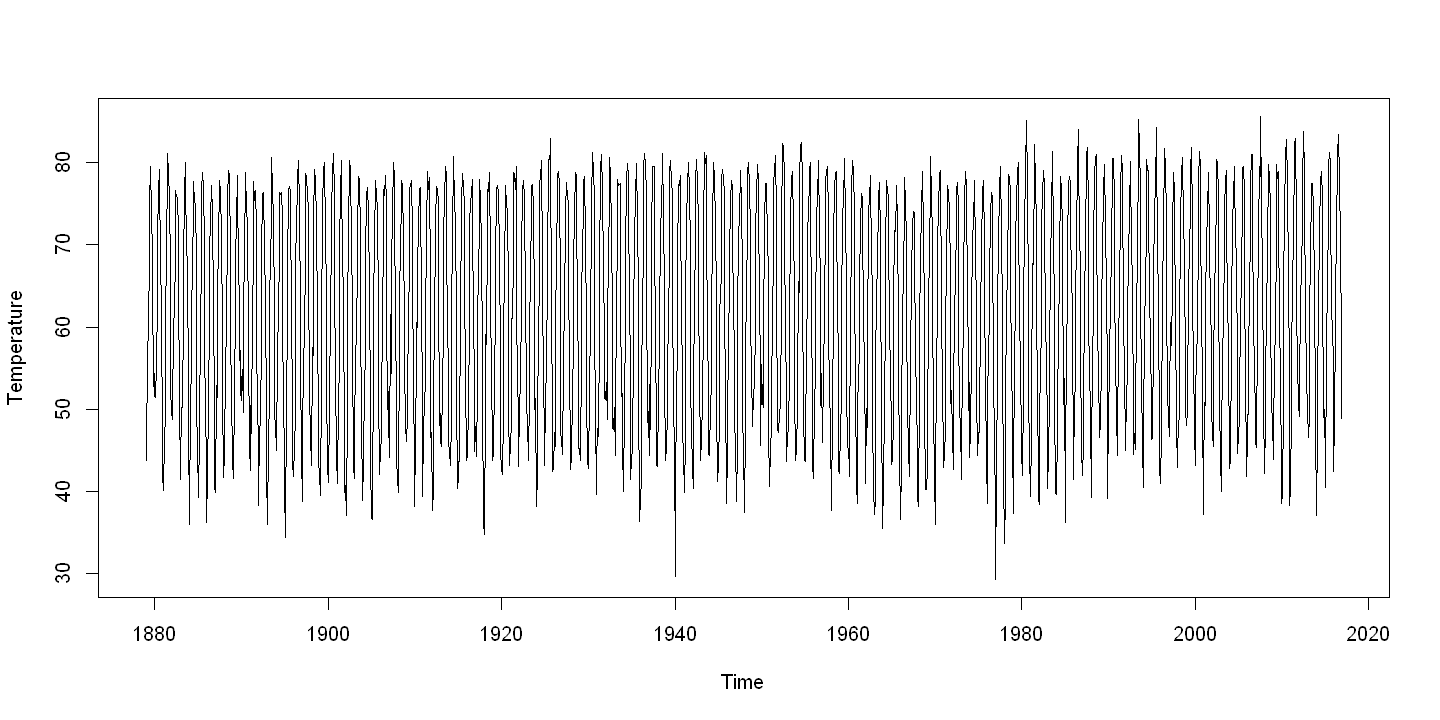

In [3]:
options(repr.plot.width=12, repr.plot.height=6)
ts.plot(temp,ylab="Temperature")

The plot is here. 
- As expected, **there is seasonality in this time series.** We will explore the seasonality in the next two lessons. 
- The range of temperature values goes from as low as 30 Fahrenheit degrees to as high as 85 degrees. 
- Note that those are average monthly temperature, not capturing some extreme temperature values, higher than 85 degrees. 

Looking at this plot alone, **it is difficult to identify a trend over time.** We’ll employ the estimation approaches I introduced in the previous lesson for estimating the trend for these data.

### Trend: Moving Average

- We will begin with estimation of the trend using the **moving average approach.**
- Note that here I simply considered the time domain between 0 and 1 with the time points in this time domain equally spaced as the R code on the slide provides. 
- This is commonly used in fitting trends using nonparametric approaches. 
- Next, I use the **ksmooth() R command which is used for kernel regression.**
- Note that I mentioned in the previous lesson that moving average is a particular case of kernel regression where we use a constant **kernel within a moving window, which in this case is called box kernel.**
- Thus, specifying **kernel equals box** in this R command will give us a moving average estimator of the trend. 
- With the ts() command, I transformed the fitted trend into a time series, then plot it overlaying on top of the observed time series using the lines command. 
- I also added the constant line to compare the fitted trend with the constant line using the abline() command. 

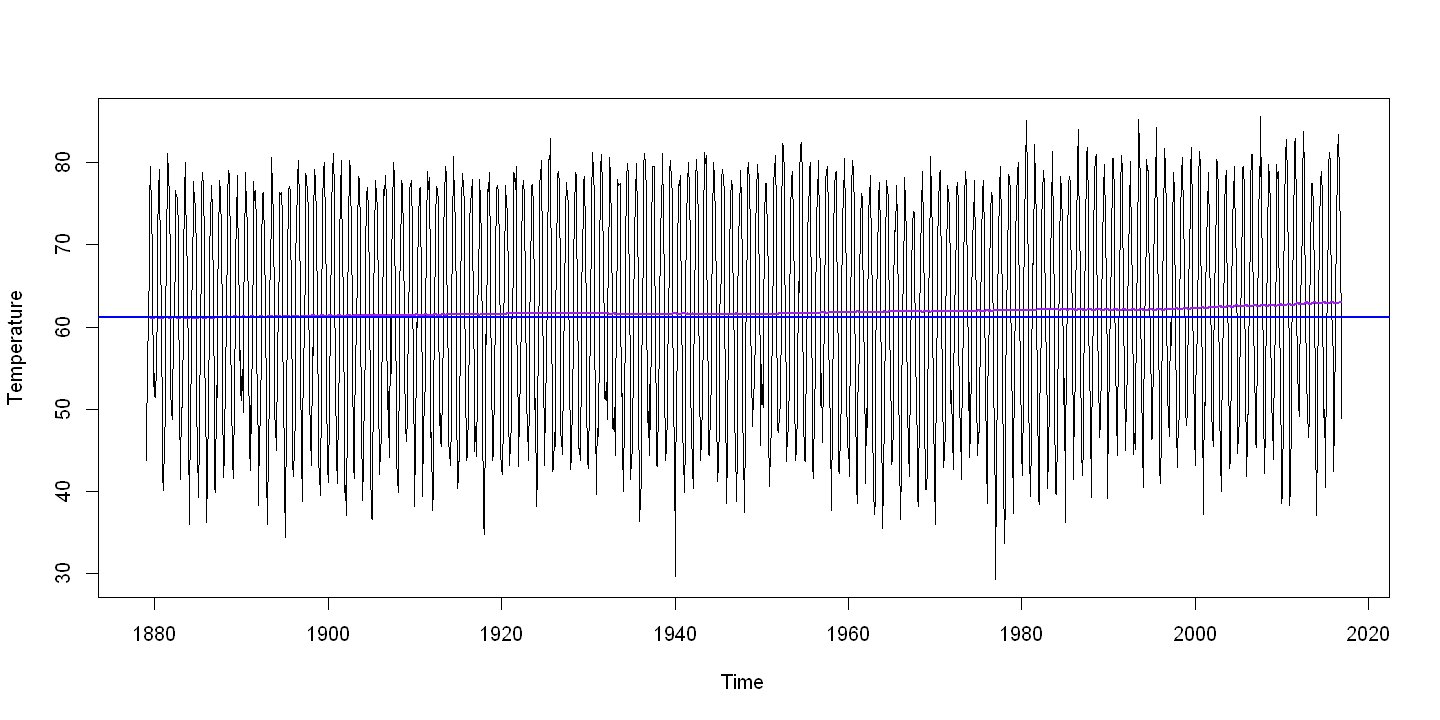

In [4]:
############### TREND ESTIMATION ###################
## Is there a trend in the average temperature?

## X-axis points converted to 0-1 scale, common in nonparametric regression
time.pts = c(1:length(temp))
time.pts = c(time.pts - min(time.pts))/max(time.pts)

## Fit a moving average 
mav.fit = ksmooth(time.pts, temp, kernel = "box")
temp.fit.mav = ts(mav.fit$y,start=1879,frequency=12)
ts.plot(temp,ylab="Temperature")
lines(temp.fit.mav,lwd=2,col="purple")
abline(temp.fit.mav[1],0,lwd=2,col="blue")

- The plot is here, the purple line is the fitted moving average trend and the blue line is the constant line. 
- From this plot we see a slight increase of the trend as compared to the constant line although it is hard to notice the difference since the variability of the data is large as compared to that of the estimated trend.

### Trend: Parametric Regression

- For fitting a ***parametric regression model, we can use the lm() command in R** used for fitting a linear regression model. 
- The predicting variables are the linear and quadratic time points. 
- In the lm command, we specify the time series on the left of tilde, which is the response data in fitting the linear regression model. 
- On the right of tilde in this command, we have the two predicting variables; here we fit a quadratic trend. 
- From model output, the **coefficients corresponding to the two predicting variables are not statistically significant because the p-values are large.**
- Similar to the moving average trend, I use the ts() command to transform the fitted values based on this model into a time series. I used a similar approach to plot the trend against the observed data. 

In [5]:
## Fit a parametric quadraric polynomial
x1 = time.pts
x2 = time.pts^2
lm.fit = lm(temp~x1+x2)
summary(lm.fit)


Call:
lm(formula = temp ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.770 -11.886   0.514  13.418  22.942 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.4247     0.9841  62.420   <2e-16 ***
x1           -1.5723     4.5481  -0.346    0.730    
x2            3.4937     4.4062   0.793    0.428    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.36 on 1653 degrees of freedom
Multiple R-squared:  0.002098,	Adjusted R-squared:  0.0008903 
F-statistic: 1.737 on 2 and 1653 DF,  p-value: 0.1763


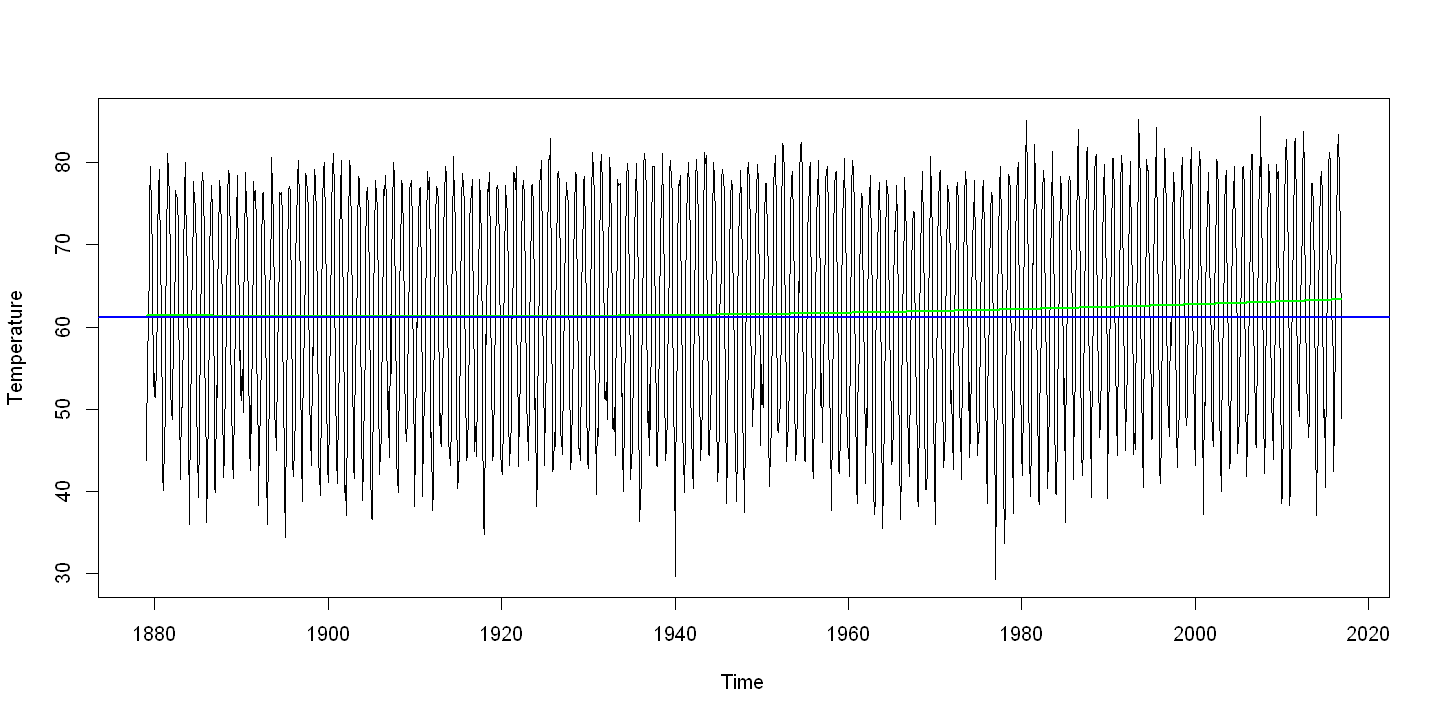

In [6]:
temp.fit.lm = ts(fitted(lm.fit),start=1879,frequency=12)
ts.plot(temp,ylab="Temperature")
lines(temp.fit.lm,lwd=2,col="green")
abline(temp.fit.mav[1],0,lwd=2,col="blue")

The plot is here. The green line is the fitted trend and the blue line is the constant line. From this plot, we see a slight increase of the trend as compared to the constant line.

### Trend: Non- Parametric Regression

- I'm providing the R commands that can be used to fit a trend using **local polynomial regression and the splines regression.**
- The common function used to fit a **local polynomial regression is loess.**
- The input consists of the time series on the left, and the time points on the right. 
- Once that's fitted, we can transform the fitted values using the ts() command into a time series. 
- **For splines regression, there are many R libraries and commands that can be used. I generally prefer using the gam command from the mgcv library because this R command is flexible in terms of the type of the model to be fitted.**
- Using this command, we'll **need to transform the time point using s() of the time points, to specify that we want a splines fit.** 
- If we did not specify this, the gam will fit a linear model with respect to the time points. Next, I overlaid the fitted trends from the two models to the observed time series. 

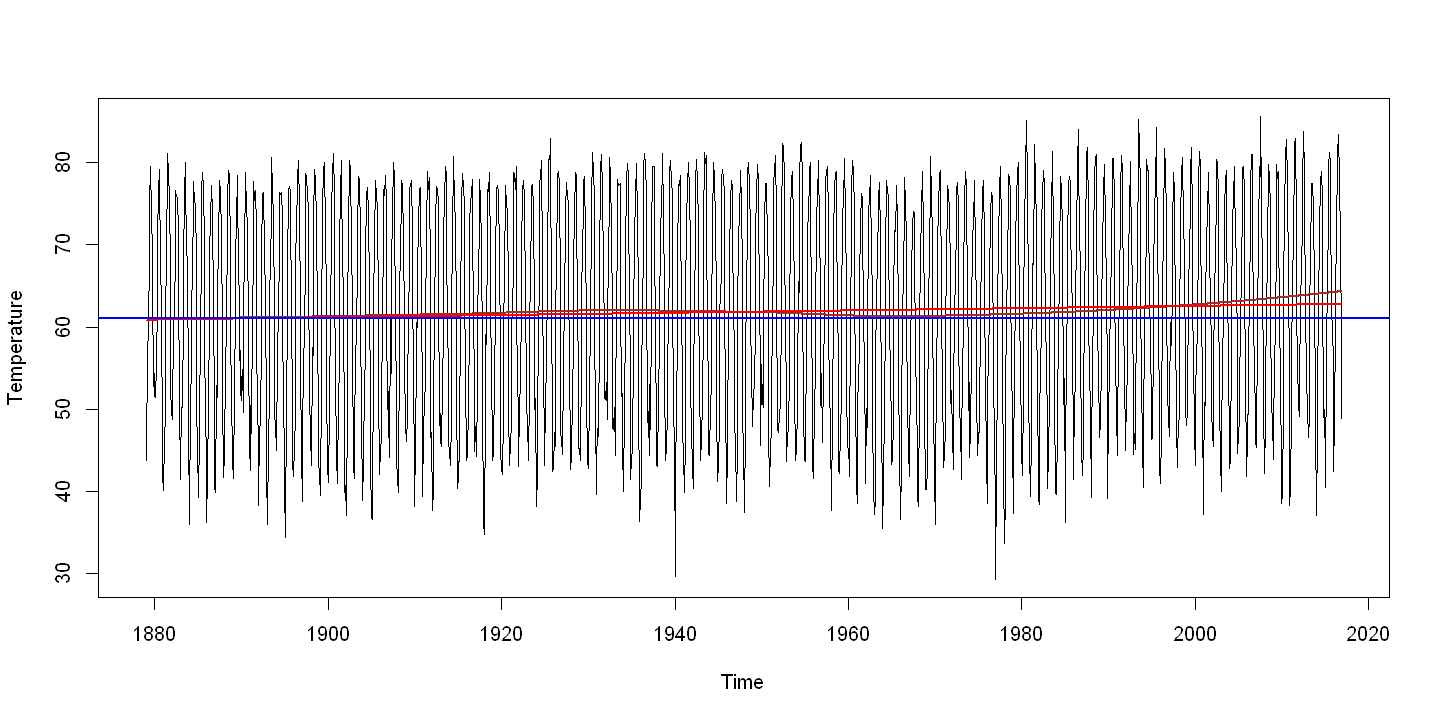

In [7]:
## Fit a trend using non-parametric regression
## Local Polynomial Trend Estimation
loc.fit = loess(temp~time.pts)
temp.fit.loc = ts(fitted(loc.fit),start=1879,frequency=12)

## Splines Trend Estimation
gam.fit = gam(temp~s(time.pts))
temp.fit.gam = ts(fitted(gam.fit),start=1879,frequency=12)

## Is there a trend? 
ts.plot(temp,ylab="Temperature")
lines(temp.fit.loc,lwd=2,col="brown")
lines(temp.fit.gam,lwd=2,col="red")
abline(temp.fit.loc[1],0,lwd=2,col="blue")

The plot is here. In this plot, we see clearly that there is an increasing trend over time

### Trend: Comparison

- Last, I'm comparing the estimated trends based on the four approaches: moving average, parametric quadratic regression, local polynomial regression and splines regression. 
- This time, I only plotted the trends to see clearly the difference in the fitted trends.
- The first two command lines are to provide the scale of the plots, such that all the trends will be plotted on the same scale.
- Then I plotted the trends along with the legend command, which allows identification of the lines with the corresponding trend estimation method

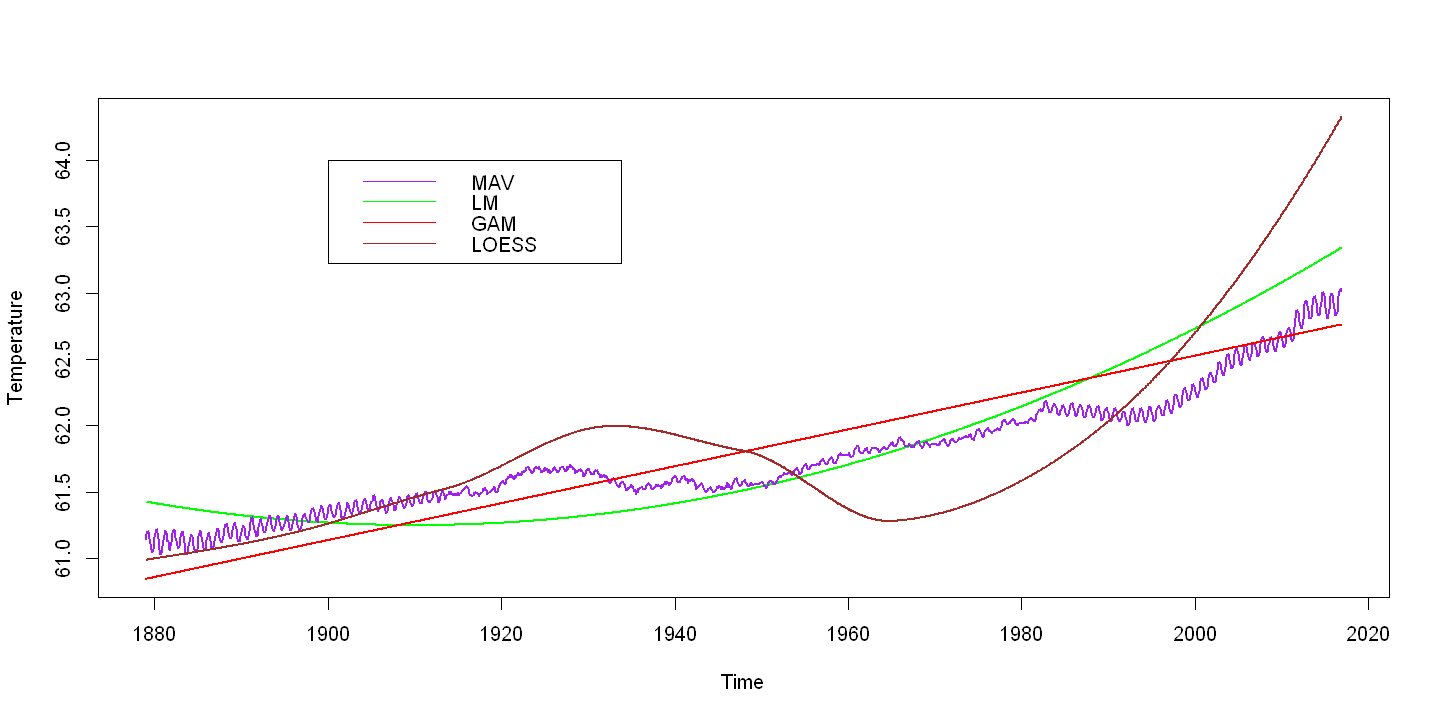

In [8]:
## Compare all estimated trends
all.val = c(temp.fit.mav,temp.fit.lm,temp.fit.gam,temp.fit.loc)
ylim= c(min(all.val),max(all.val))
ts.plot(temp.fit.lm,lwd=2,col="green",ylim=ylim,ylab="Temperature")
lines(temp.fit.mav,lwd=2,col="purple")
lines(temp.fit.gam,lwd=2,col="red")
lines(temp.fit.loc,lwd=2,col="brown")
legend(x=1900,y=64,legend=c("MAV","LM","GAM","LOESS"),lty = 1, col=c("purple","green","red","brown"))

- From this plot we see that the moving average trend is quite wiggly, slightly capturing some of the seasonality thus not a good estimate.
- The estimated trend using the parametric model is comparable to that fitted using the splines regression; generally both capture a similarly increasing trend over time.
- The fit using local polynomial regression shows more complexity in the trend, with some smooth ups and downs; generally it also shows an increase in the temperature over time.

From all four approaches, we find an increase in temperature with about 2 degrees in the last 138 years.

### Seasonality: Seasonal Models

- A first model we discussed in the previous lesson is the seasonal means model. In this model, we fit a linear regression model with dummy variables, with each one specifying the seasonal effect of one month.
- This is **equivalent with an ANOVA model, where the data are categorized into seasonal groups**. 
- For this approach, as well as for the second estimation approach presented in the previous lesson, we’ll need the R commands in the library dynlm(). 
- Originally, I used the library TSA, but this library is not available for the most recent R versions. **The dynlm() command is an lm() model allowing for modeling a linear trend and seasonality simultaneously.**
- For example, to apply the seasonal means model, we can use the season() option in the dynlm to specify that we want to include the monthly dummy variables. 
- We can fit a model with intercept as in model1 where we specify the time series on the left and the seasonal dummy variables on the right, where those dummy variables will represent the month. 
- **But this model omits the January coefficient. In this case, the January effect is the baseline hence the February coefficient is interpreted as a difference between February and January average temperatures, for example.**
- **Alternatively,** for a simpler interpretation of the coefficients as individual seasonal effects, we can **fit the model without an intercept, as provided in model2**.

- Next, is the implementation of the **cos-sin model. We can use the harmon option in dynlm where the input is the time series and the frequency,** where model3 uses only frequency equal to 1, the default. 
- Additional cosine functions or other frequencies will frequently be used to model cyclical trends. For monthly series there are harmonic frequencies such as 2 over 12 or 3 over 12 that are especially pertinent and will sometimes improve the fit, at the expense of additional parameters. 
- For example, we can use the model with 2 over 12 as provided in model4.

### Seasonality: Seasonal Means Model

In [9]:
################ SEASONALITY ESTIMATION #########################

## Estimate seasonality using ANOVA approach
## Drop January (model with intercept)
model1 = lm(temp~season(temp))
summary(model1)


Call:
lm(formula = temp ~ season(temp))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9072  -1.9636  -0.0986   1.9437  12.5275 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            43.2072     0.2725 158.534  < 2e-16 ***
season(temp)February    2.7514     0.3854   7.139 1.41e-12 ***
season(temp)March      10.0232     0.3854  26.005  < 2e-16 ***
season(temp)April      18.4014     0.3854  47.742  < 2e-16 ***
season(temp)May        26.5623     0.3854  68.916  < 2e-16 ***
season(temp)June       33.4913     0.3854  86.893  < 2e-16 ***
season(temp)July       35.7978     0.3854  92.877  < 2e-16 ***
season(temp)August     35.0630     0.3854  90.971  < 2e-16 ***
season(temp)September  30.0913     0.3854  78.071  < 2e-16 ***
season(temp)October    19.7543     0.3854  51.252  < 2e-16 ***
season(temp)November    9.3420     0.3854  24.238  < 2e-16 ***
season(temp)December    1.8652     0.3854   4.839 1.43e-06 ***
---
Signif. codes:  0

In [10]:
## All seasonal mean effects (model without intercept)
model2 = lm(temp~season(temp)-1)
summary(model2)


Call:
lm(formula = temp ~ season(temp) - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9072  -1.9636  -0.0986   1.9437  12.5275 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
season(temp)January    43.2072     0.2725   158.5   <2e-16 ***
season(temp)February   45.9587     0.2725   168.6   <2e-16 ***
season(temp)March      53.2304     0.2725   195.3   <2e-16 ***
season(temp)April      61.6087     0.2725   226.1   <2e-16 ***
season(temp)May        69.7696     0.2725   256.0   <2e-16 ***
season(temp)June       76.6986     0.2725   281.4   <2e-16 ***
season(temp)July       79.0051     0.2725   289.9   <2e-16 ***
season(temp)August     78.2703     0.2725   287.2   <2e-16 ***
season(temp)September  73.2986     0.2725   268.9   <2e-16 ***
season(temp)October    62.9616     0.2725   231.0   <2e-16 ***
season(temp)November   52.5493     0.2725   192.8   <2e-16 ***
season(temp)December   45.0725     0.2725   165.4   <2e-16 ***
---
Signif. codes

- This is a portion of the output of model2, the model with all dummy variables without the intercept. **The estimated regression coefficients provide the means for each individual seasonal group.**

- For example, the average for all temperature values in January is 43.2. And the average for all temperature values in July is 79. 


**In order to get the seasonal effect, we need to subtract from each of the means the average across all of the estimated means.** 


According to this model, July and August are the hottest months of the year whereas January is the coldest. 

In the output, we also have the R-squared or so-called the coefficient of determination, which is an indication of the variability explained by the predicting variables in the linear model. 

- For this model, the R-square is very large, 99.7% indicating that the seasonality effects explain most of the variability in the monthly average temperature over years.

### Seasonality: Cos-Sin Model

In [11]:
## Estimate seasonality using cos-sin model
model3=lm(temp~harmonic(temp))
summary(model3)


Call:
lm(formula = temp ~ harmonic(temp))

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2003  -2.0059  -0.2022   2.0005  12.4493 

Coefficients:
                           Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                61.80254    0.08133  759.870  < 2e-16 ***
harmonic(temp)cos(2*pi*t) -18.30228    0.11502 -159.119  < 2e-16 ***
harmonic(temp)sin(2*pi*t)  -0.69366    0.11502   -6.031 2.01e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.31 on 1653 degrees of freedom
Multiple R-squared:  0.9388,	Adjusted R-squared:  0.9387 
F-statistic: 1.268e+04 on 2 and 1653 DF,  p-value: < 2.2e-16


In [12]:
model4=lm(temp~harmonic(temp,2))
summary(model4)


Call:
lm(formula = temp ~ harmonic(temp, 2))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5699  -2.0031  -0.1105   1.9524  12.5301 

Coefficients:
                              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                   61.80254    0.07888  783.490  < 2e-16 ***
harmonic(temp, 2)cos(2*pi*t) -18.30228    0.11155 -164.065  < 2e-16 ***
harmonic(temp, 2)cos(4*pi*t)  -0.63031    0.11155   -5.650 1.88e-08 ***
harmonic(temp, 2)sin(2*pi*t)  -0.69366    0.11155   -6.218 6.36e-10 ***
harmonic(temp, 2)sin(4*pi*t)   0.96246    0.11155    8.628  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.21 on 1651 degrees of freedom
Multiple R-squared:  0.9425,	Adjusted R-squared:  0.9424 
F-statistic:  6766 on 4 and 1651 DF,  p-value: < 2.2e-16


This is the output for the two models using the cos-sin decomposition of seasonality. The difference between the two models is that in the second, we're adding one more set of cos-sin harmonics. 

We can see from the output that the estimated coefficients for the first set of harmonics are similar for the two models. Moreover, the second set of harmonics, with a frequency 2 over 12 have statistically significant coefficients, provided that the harmonics with a frequency 1 over 12 are in the model.

The R-squared is slightly lower for these two models as compared with the R-squared for the seasonal mean model. Moreover, the **adjusted R-squared increases with the addition of the other set of harmonics, an indication that perhaps including higher frequency harmonics adds to the explanatory power of the linear model.**

### Seasonality: Compare Models

Here we compare the seasonality fit for the two models. 

- For the first model, the fit for the seasonal component is provided by the regression coefficients and expressed in the R code by the R function coef() of the fitted model. 
- For the second model, the fitted seasonal component is provided by the fitted values of the regression. 
- We can compare the fit of the seasonality by overlaying all the fitted seasonality in to one plot

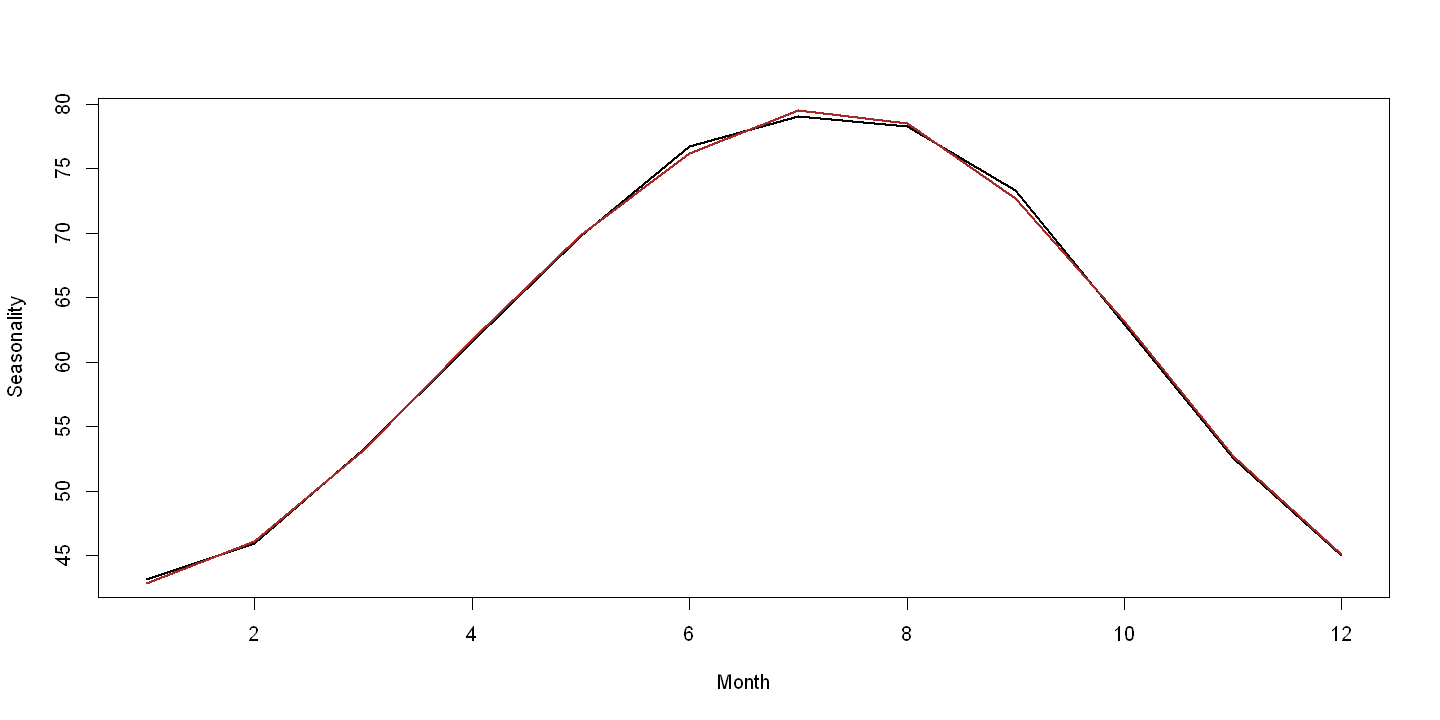

In [13]:
## Compare Seasonality Estimates
## Seasonal Means Model
st1 = coef(model2)
## Cos-Sin Model
st2 = fitted(model4)[1:12]

plot(1:12,st1,lwd=2,type="l",xlab="Month",ylab="Seasonality")
lines(1:12,st2,lwd=2, col="brown")

The plot is here as provided by the R code, the seasonality fitted using the Seasonal Means Model is in black and the sine-cosine model is in brown. 

As seen in this plot, both are very similar in fitting the seasonality. Because the fit is almost the same, we would prefer the model with fewer regression coefficients particularly the sine-cosine model.

### Seasonality & Trend: Parametric Model

- In a different lesson, we found that there is a slightly increasing trend in temperature over time. 
- Thus, we would like to estimate both seasonality and trend jointly.
- We'll begin with the simplest parametric model, **where we consider a quadratic trend and seasonality model using the cosine-sine model.**
- For this, we specify in the dynlm R command, the response variable, the time series for the average monthly temperature values, and the predicting variables for both the trend and seasonality together. 
- In order to evaluate the statistical significance of the trend and seasonality, you can further analyze this model. For example, one could test whether the trend adds any explanatory power for the model, given that seasonality is already in the model. 
- Such evaluation method for linear regression has been introduced in the regression analysis course. Here, we'll only plot the residuals introduced removing the trend and seasonality. Specifically, subtracting from the time series, the fitted values of the linear model.

In [14]:
################ TREND AND SEASONALITY ESTIMATION #########################
## Using linear regression

## Fit a parametric model for both trend and seasonality
## Linear trend
lm.fit.lin = dynlm(temp~trend(temp)+harmon(temp,2))

## Quadratic trend
x1 = time.pts
x2 = time.pts^2
lm.fit = dynlm(temp~x1+x2+harmon(temp,2))
summary(lm.fit)


Time series regression with "ts" data:
Start = 1879(1), End = 2016(12)

Call:
dynlm(formula = temp ~ x1 + x2 + harmon(temp, 2))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8242  -1.9505  -0.1554   1.9744  12.7916 

Coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)          61.4620     0.2324  264.456  < 2e-16 ***
x1                   -1.6526     1.0741   -1.538 0.124119    
x2                    3.5021     1.0406    3.365 0.000782 ***
harmon(temp, 2)cos1 -18.3012     0.1097 -166.844  < 2e-16 ***
harmon(temp, 2)cos2  -0.6292     0.1097   -5.736 1.15e-08 ***
harmon(temp, 2)sin1  -0.6895     0.1097   -6.286 4.17e-10 ***
harmon(temp, 2)sin2   0.9644     0.1097    8.792  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.156 on 1649 degrees of freedom
Multiple R-squared:  0.9445,	Adjusted R-squared:  0.9443 
F-statistic:  4675 on 6 and 1649 DF,  p-value: < 2.2e-16


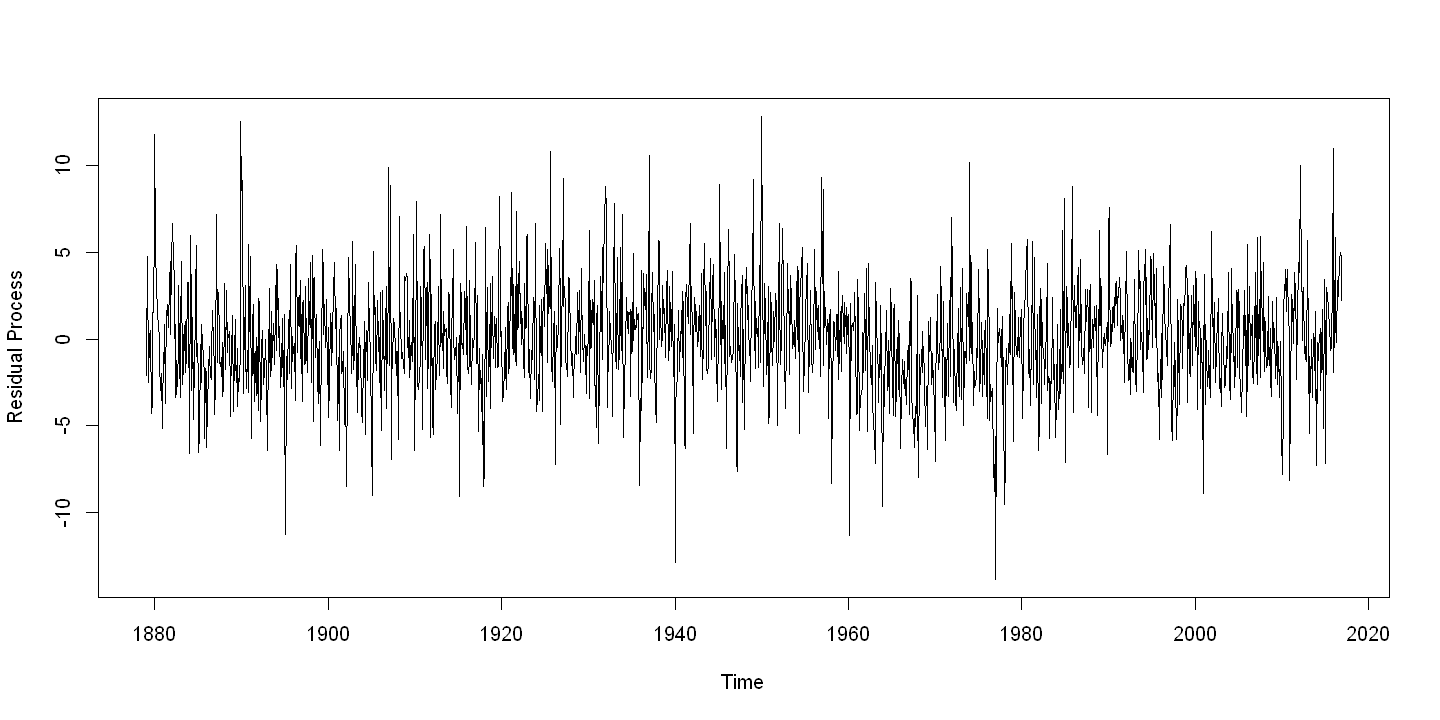

In [15]:
dif.fit.lm = ts((temp-fitted(lm.fit)),start=1879,frequency=12)
ts.plot(dif.fit.lm,ylab="Residual Process")

The time series plot of the residual process is here. In a different lecture, we'll study ways to evaluate whether such process is stationary. In other words, whether the trend and seasonality components have been removed.

### Fit a non-parametric model for trend and linear model for seasonality

- We can also fit a non-parametric trend along with the seasonality given by the cosine-sine model. 
- The gam function in R allows fitting non-parametric and linear components jointly. 
- To do so, we specify that the trend in time is non-parametric while not imposing any transformation on the seasonality thus, adding the harmonics to the non-parametric trend. 
- Please note that I used the harmonics function provided in the R code available with this module. The function was part of the TSA library. Next, we compare the residual processes for both methods

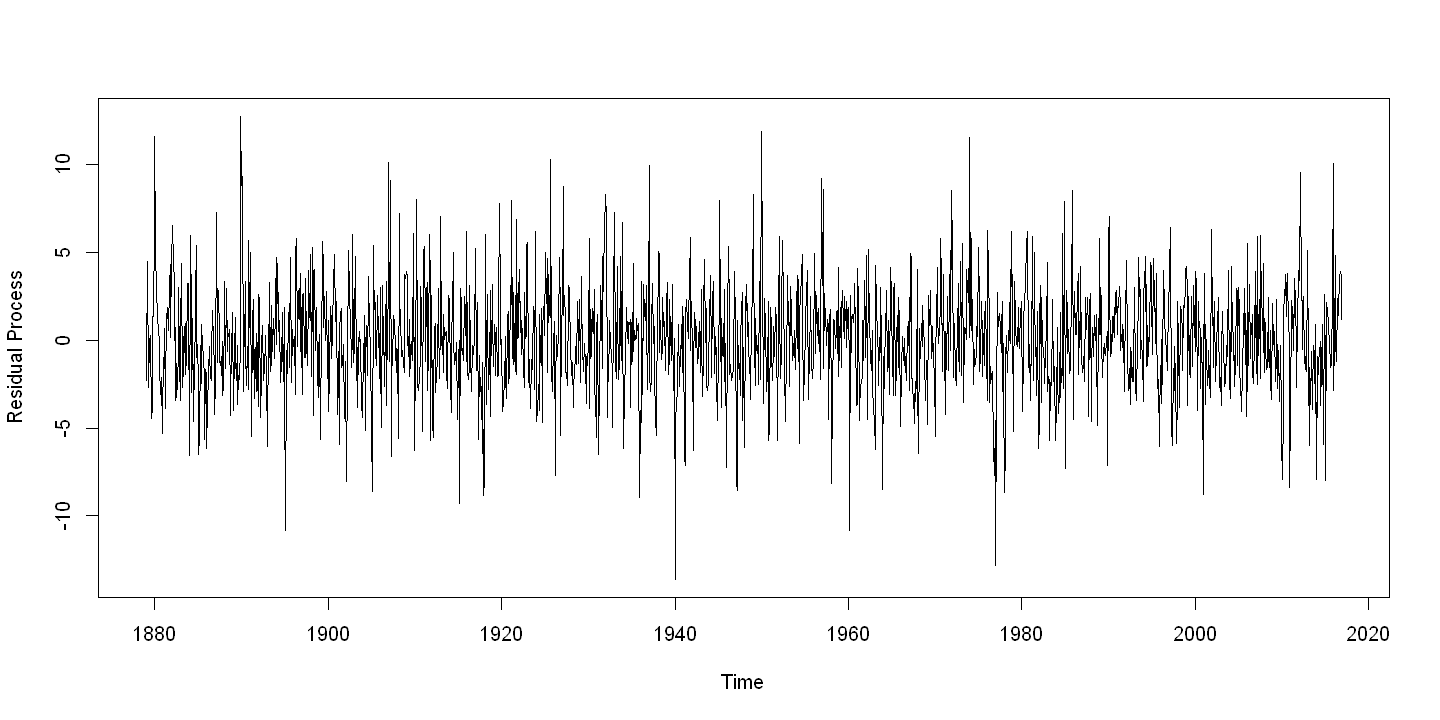

In [16]:
## Fit a non-parametric model for trend and linear model for seasonality
har2 = harmonic(temp,2)
gam.fit = gam(temp~s(time.pts)+har2)
dif.fit.gam = ts((temp-fitted(gam.fit)),start=1879,frequency=12)
ts.plot(dif.fit.gam,ylab="Residual Process")

### Seasonality & Trend: Compare Models

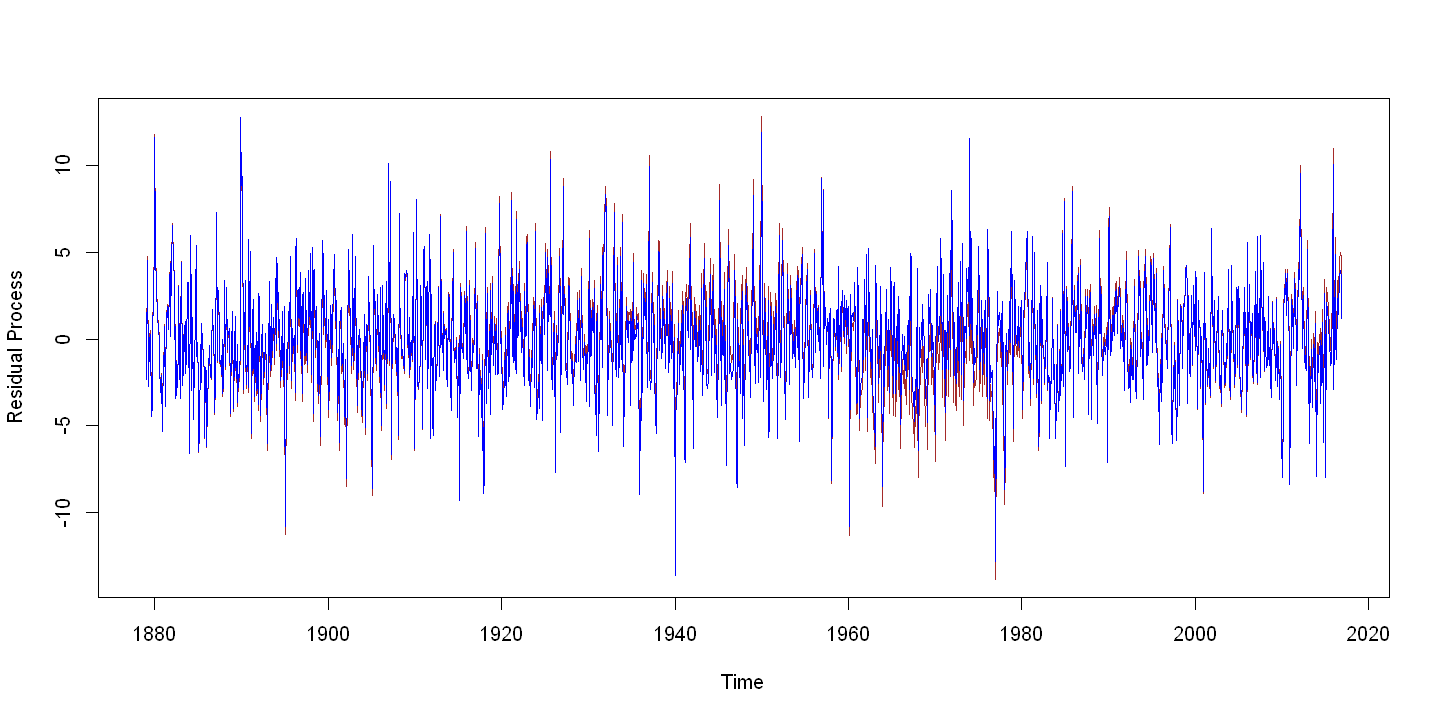

In [17]:
## Compare approaches 
ts.plot(dif.fit.lm,ylab="Residual Process",col="brown")
lines(dif.fit.gam,col="blue")

Here is the plot comparing the residual processes, where brown is the process for the parametric model and in blue is residual process from the non-parametric model. The differences are small between the two approaches.

### Sample Autocorrelation Functions

**The question that we'd like to answer: is this residual process stationary?**

- A stationary process is described by the behavior of its autocovariance or autocorrelation function. 
- Thus, let's look at the sample autocorrelation functions for the residual plots from the two approaches. 
- The R command is ACF(), which can be used to estimate both the autocovariance and autocorrelation functions. 
- The default of the R command is the autocorrelation. 
- We're plotting here the ACF for both the temperature time series and the residual process after removing the trend and seasonality using the two approaches. 
- A stationary process is described by the behavior of its autocovariance or autocorrelation function.

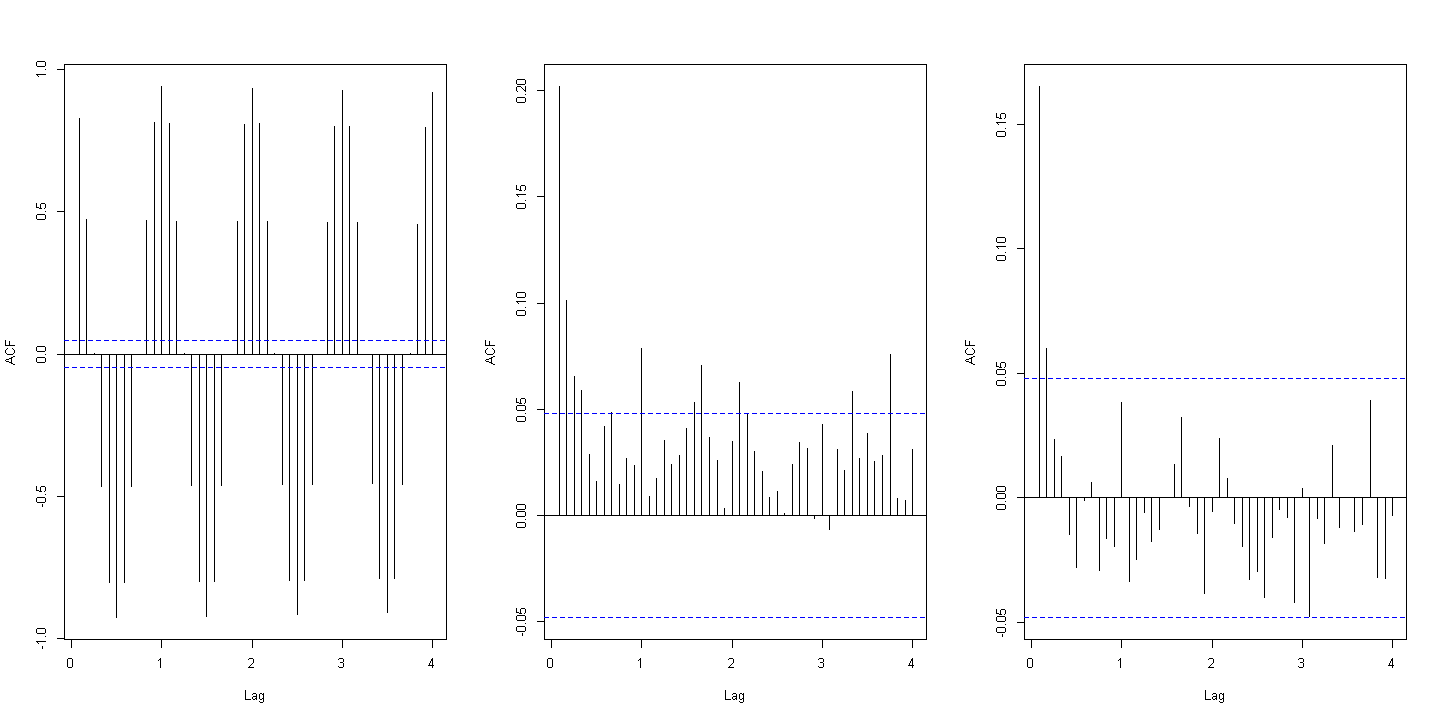

In [18]:
par(mfrow=c(1,3))

acf(temp,lag.max=12*4,main="")
acf(dif.fit.lm,lag.max=12*4,main="")
acf(dif.fit.gam,lag.max=12*4,main="")

The ACF plot of the temperature process is here. The X-axis shows the lag ‘h’ at which we estimate the autocorrelation function and the Y-axis is for the sample autocorrelation.  **The ACF plot shows a clear seasonality pattern.** The pattern repeats for each block of lags specified at 1, 2, 3 and 4 on the X-axis.

The ACF plot of the residuals from the parametric approach for estimating the trend and seasonality is here. While the seasonality observed in the ACF of the temperature time series is not present anymore, **we still observe some sort of cyclical pattern that could potentially correspond to some periodicity of the times series. Moreover, the ACF values are positive showing some bias in the estimation of trend and/or cyclical pattern.**

Last is the ACF plot for the residuals where the trend is estimated using non-parametric regression. **The ACF plot for this residual plot does not have a cyclical pattern of the ACF plot of the previous residual plot and it shows less of the bias in the removal of the trend and/or cyclical pattern.**

However, none of these observations about residual plots guarantee stationarity. We'll expand more on this aspect in a different lecture